In [1]:
import cv2
import os 
#import listdir,chdir
from matplotlib import pyplot as plt
import numpy as np
import pickle
from moviepy.editor import VideoFileClip
import math 
import matplotlib.image as mpimg
%matplotlib inline

In [276]:
def printImages(imgList, isHorizontal = False):
    size = len(imgList)
    plt.figure()
    for idx, img in enumerate(imgList):
        if isHorizontal:
            plt.subplot(1,size, idx + 1)
        else:
            plt.subplot(size,1, idx + 1)
        plt.imshow(img, cmap='gray', aspect ='equal')
    plt.show()

def printImagesWithPath(path1, path2):
    img1 = mpimg.imread(path1)
    img2 = mpimg.imread(path2)
    printImages([img1, img2])

def printChessBoxImages(path, outputPath, filename):
    printImagesWithPath(path+filename, outputPath + 'Output_' + filename)


# Calibrating the camera by the Chess box Image

Start to process calibration1.jpg
Fail to draw corners for calibration1.jpg
Start to process calibration10.jpg


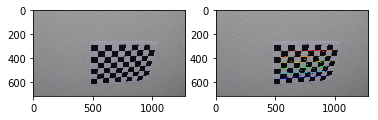

Start to process calibration11.jpg


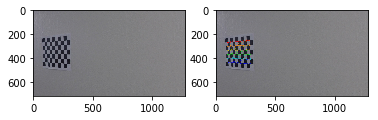

Start to process calibration12.jpg


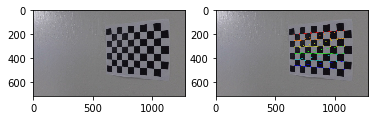

Start to process calibration13.jpg


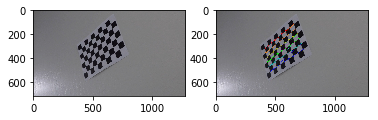

Start to process calibration14.jpg


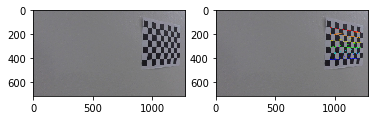

Start to process calibration15.jpg


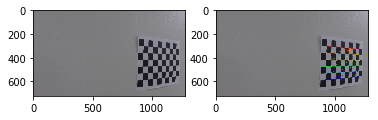

Start to process calibration16.jpg


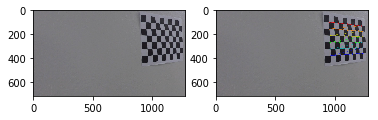

Start to process calibration17.jpg


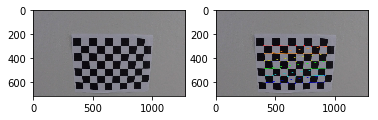

Start to process calibration18.jpg


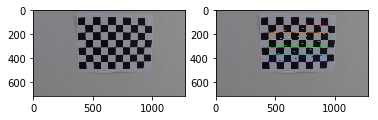

Start to process calibration19.jpg


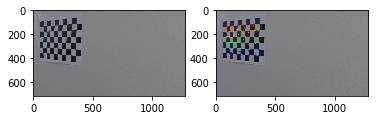

Start to process calibration2.jpg


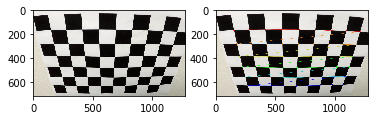

Start to process calibration20.jpg


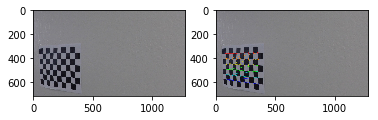

Start to process calibration3.jpg


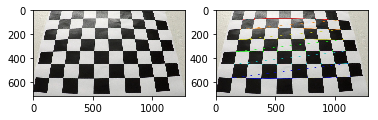

Start to process calibration4.jpg
Fail to draw corners for calibration4.jpg
Start to process calibration5.jpg
Fail to draw corners for calibration5.jpg
Start to process calibration6.jpg


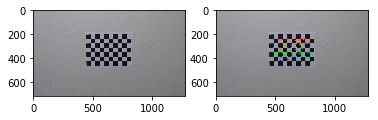

Start to process calibration7.jpg


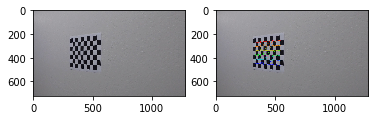

Start to process calibration8.jpg


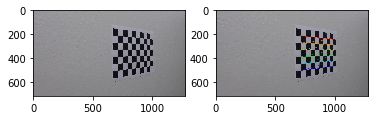

Start to process calibration9.jpg


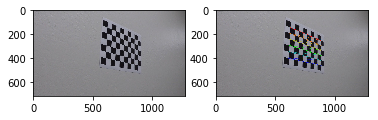

Start to undistort calibration1.jpg


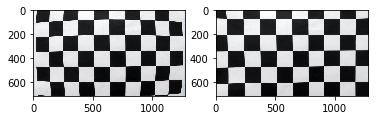

Start to undistort calibration10.jpg


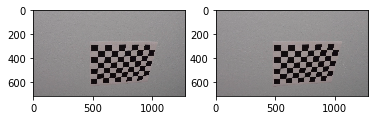

Start to undistort calibration11.jpg


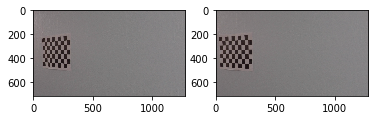

Start to undistort calibration12.jpg


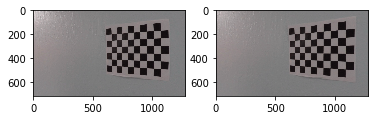

Start to undistort calibration13.jpg


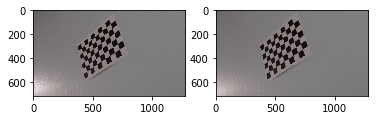

Start to undistort calibration14.jpg


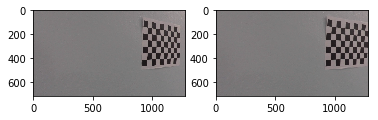

Start to undistort calibration15.jpg


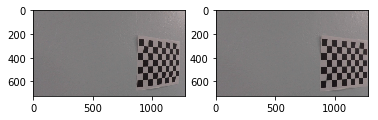

Start to undistort calibration16.jpg


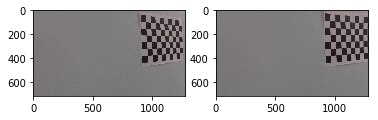

Start to undistort calibration17.jpg


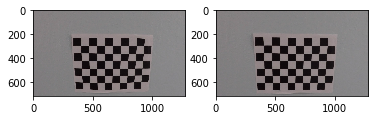

Start to undistort calibration18.jpg


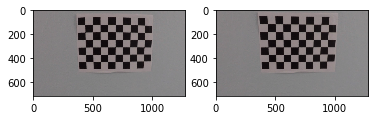

Start to undistort calibration19.jpg


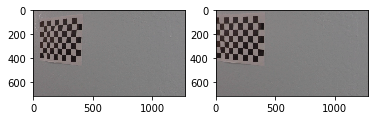

Start to undistort calibration2.jpg


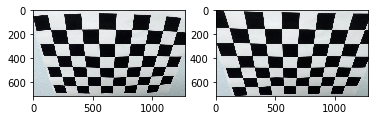

Start to undistort calibration20.jpg


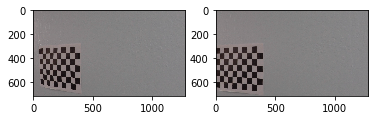

Start to undistort calibration3.jpg


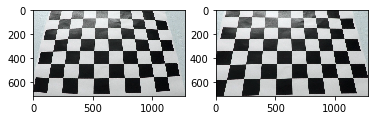

Start to undistort calibration4.jpg


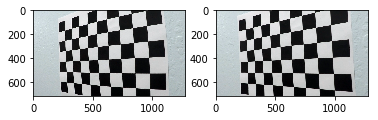

Start to undistort calibration5.jpg


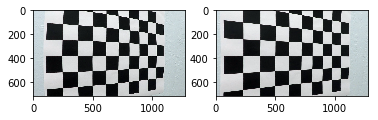

Start to undistort calibration6.jpg


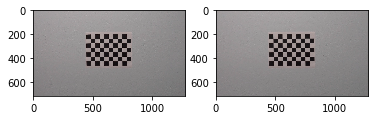

Start to undistort calibration7.jpg


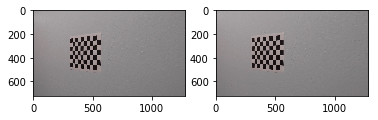

Start to undistort calibration8.jpg


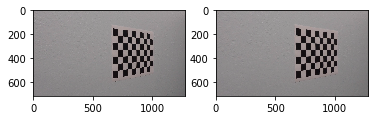

Start to undistort calibration9.jpg


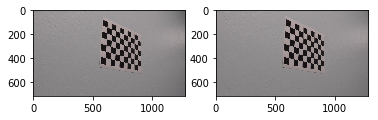

In [7]:
# Path Setting
calibrationPath = ".\\camera_cal\\"
calibration_outputPath = ".\\camera_cal_output\\"
chessboxImages = os.listdir(calibrationPath)

# set the number of inner corners
nx= 9
ny = 6

# prepare object points
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Initialize input forcamera calibration.
objectPoints = [] # 3d points in real world space
imagePoints = [] # 2d points in image plane.
img_size = None

#Read the calibration images, find and draw the corners.
#save the images to file
for name in chessboxImages:
    print("Start to process %s" %name )
    img = cv2.imread(calibrationPath+name)
    if img_size is None:
        img_size = (img.shape[1], img.shape[0])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    if ret:
        objectPoints.append(objp)
        imagePoints.append(corners)
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        write_name = calibration_outputPath + 'Draw_' + name
        cv2.imwrite(write_name, img)
        printImagesWithPath(calibrationPath+name, write_name)
    else:
        print("Fail to draw corners for %s" %name )

# Get the calibration parameter of the Camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectPoints , imagePoints, img_size,None,None)

def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)

#Undistort the calibration images
for name in chessboxImages:
    print("Start to undistort %s" %name )
    img = cv2.imread(calibrationPath+name)
    und = undistort(img)
    printImages([img, und])
    undistort_name = calibration_outputPath + 'Undistort_'+names
    cv2.imwrite(undistort_name,und)
    

# Test undistort to test images

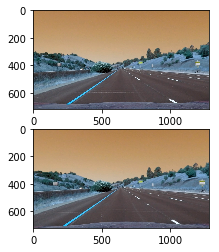

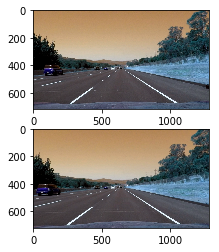

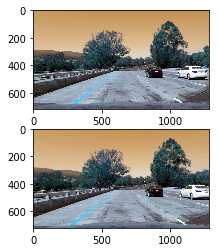

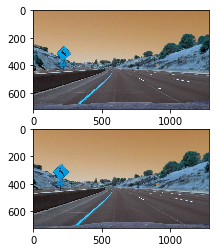

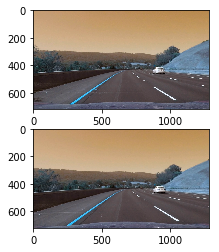

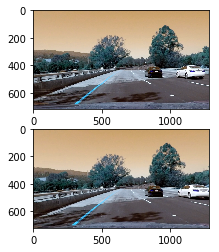

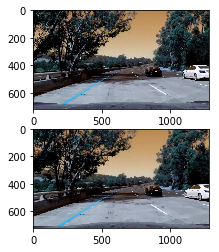

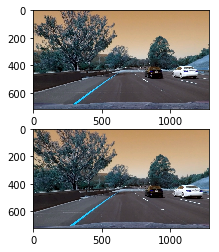

In [283]:
# Set the test Path
test_path = ".\\test_images\\"
test_output_path = ".\\output_images\\"
testImages = os.listdir(test_path)

for names in testImages:
    img = cv2.imread(test_path+names)
    und = cv2.undistort(img, mtx, dist, None, mtx)
    printImages([img, und])
    undistort_name = test_output_path + 'Undistort_'+names
    cv2.imwrite(undistort_name,und)

# Transform the image

In [19]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

In [52]:
# Define a function to return the magnitude of the gradient
# for a given sobel kernel size and threshold values
def mag_threshold(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output


In [11]:
# Define a function to threshold an image for a given range and Sobel kernel
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

In [134]:
def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    s_channel = hls[:,:,2]

    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    
#     printImages([img])
#     printImages([s_channel])
#     printImages([binary_output])
    return binary_output

# for trial
for names in testImages:
    img = cv2.imread(test_path+names)
    txf = hls_select(img,thresh=(130, 255))

In [277]:
def combinedTransform(image, isPrint = False):
    # Choose a Sobel kernel size
    ksize = 15 # Choose a larger odd number to smooth gradient measurements
    grad_thresh = (20, 100)
    mag_thresh = (40, 100)
    dir_thresh = (0.6, 1.3)
    
    # Apply each of the thresholding functions
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=grad_thresh)
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=grad_thresh)
    mag_binary = mag_threshold(image, sobel_kernel=5, mag_thresh=mag_thresh)
    dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=dir_thresh)
    
    combinedGrad = np.zeros_like(gradx)
    combinedGrad[((gradx == 1) & (grady == 1))] = 1
    
    combinedMagDir = np.zeros_like(dir_binary)
    combinedMagDir[(mag_binary == 1) & (dir_binary == 1)] = 1
    
    hls = hls_select(img,thresh=(140, 255))
    
    combined = np.zeros_like(dir_binary)
    combined[(combinedGrad == 1) | (combinedMagDir == 1) | (hls == 1)] = 1
    

    if isPrint:
        printImages([image])
        printImages([gradx, grady])
        printImages([combinedGrad])
        printImages([mag_binary])
        printImages([dir_binary])
        printImages([combinedMagDir])
        printImages([hls])
        printImages([combined])
    
    return combined

# Curvature computation

In [268]:
#Compute Curvature
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension
x_dim = img_size[0]
y_dim = img_size[1]
def computeCurvature(left_fit,right_fit):
    left_fit_scale = np.array([(left_fit[0]*xm_per_pix)/ym_per_pix**2,(left_fit[1]*xm_per_pix)/ym_per_pix,left_fit[2]*xm_per_pix])    
    right_fit_scale = np.array([(right_fit[0]*xm_per_pix)/ym_per_pix**2,(right_fit[1]*xm_per_pix)/ym_per_pix,right_fit[2]*xm_per_pix])    
    
    left_curvature = ((1 + (2*left_fit_scale[0]*y_dim + left_fit_scale[1])**2)**1.5) / np.absolute(2*left_fit_scale[0])
    right_curvature = ((1 + (2*right_fit_scale[0]*y_dim + right_fit_scale[1])**2)**1.5) / np.absolute(2*right_fit_scale[0])
        
    center = (left_fit[0]*y_dim**2 + left_fit[1]*y_dim + left_fit[2] + right_fit[0]*y_dim**2 + right_fit[1]*y_dim + right_fit[2])/2
    offset = center - x_dim/2
    offset_real = offset*xm_per_pix
    
    return (left_curvature,right_curvature,offset_real)

Image: straight_lines1.jpg


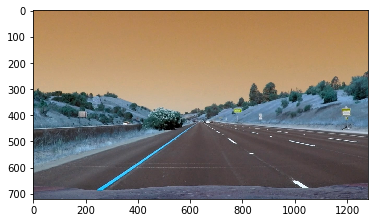

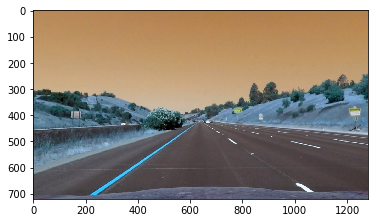

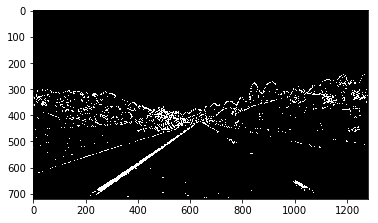

Image: straight_lines2.jpg


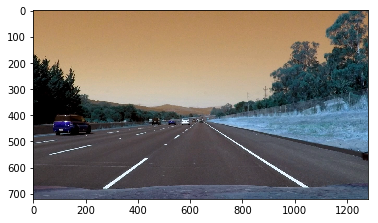

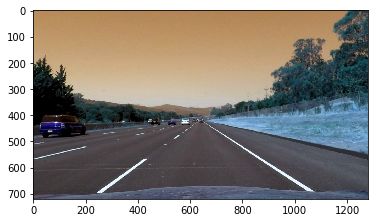

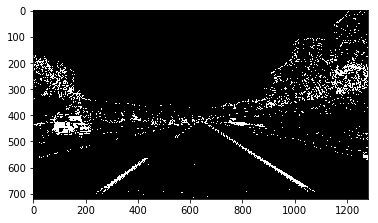

Image: test1.jpg


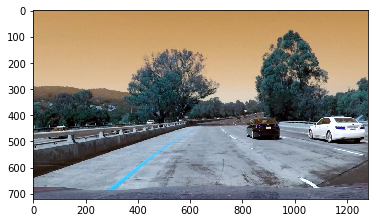

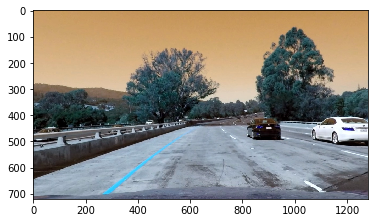

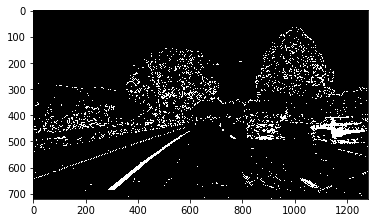

Image: test2.jpg


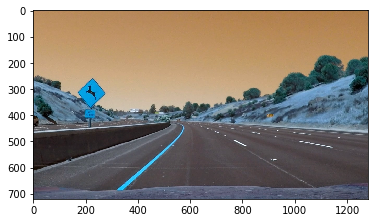

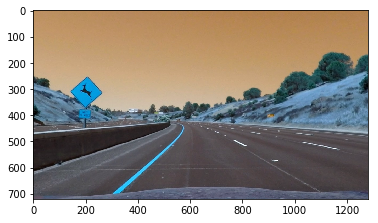

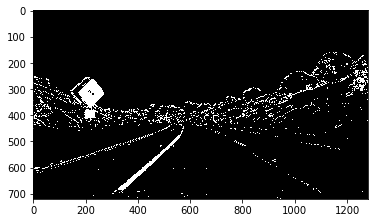

Image: test3.jpg


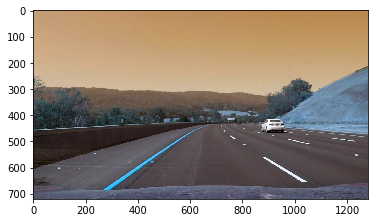

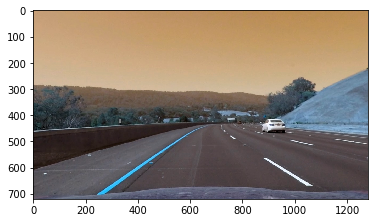

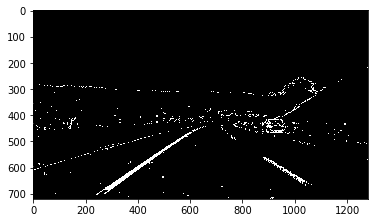

Image: test4.jpg


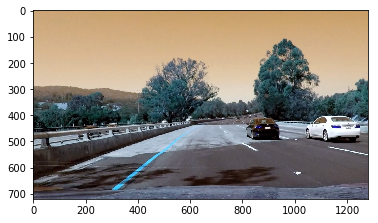

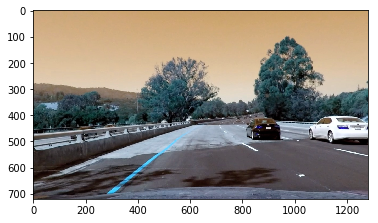

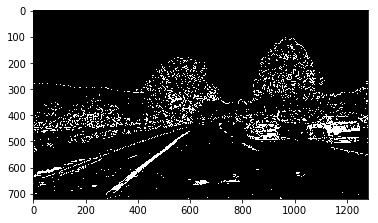

Image: test5.jpg


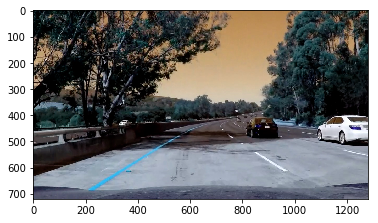

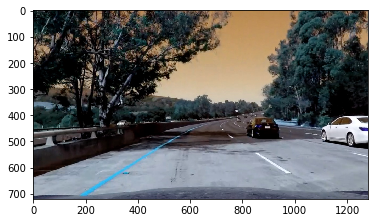

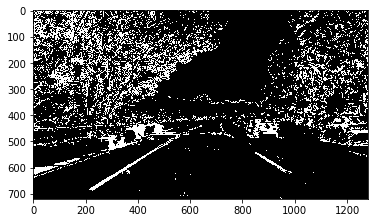

Image: test6.jpg


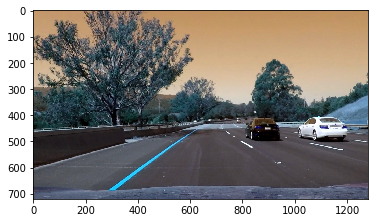

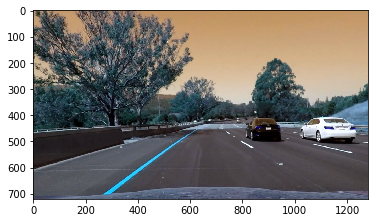

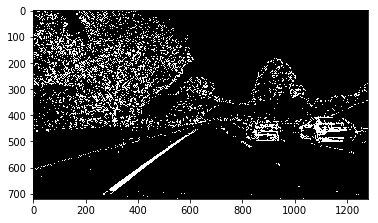

In [160]:
for names in testImages:
    img = cv2.imread(test_path+names)
    print('Image: %s' % names)
    und = undistort(img)
    txf = combinedTransform(und)
    printImages([img])
    printImages([und])
    printImages([txf])
#     printImages(img, txf)
#     undistort_name = test_output_path + 'Undistort_'+names
#     cv2.imwrite(undistort_name,und)

# Perspective transform

In [278]:
#define source and dest points
height,width = dst.shape[:2]

# Set 1 define source and destination points for transform
src1 = np.float32([(576,465),
                  (705,465), 
                  (265,685), 
                  (1042,685)])
dst1 = np.float32([(450,0),
                  (width - 450,0),
                  (450,height),
                  (width -450,height)])


# Set 2(Wider range): define source and destination points for transform
src2 = np.float32([(576,465),
                  (705,465), 
                  (300,685), 
                  (1000,685)])
dst1 = np.float32([(450,0),
                  (width - 450,0),
                  (450,height),
                  (width -450,height)])



In [228]:
def warp(img, src, dst):
    h,w = img.shape[:2]
    # use cv2.getPerspectiveTransform() to get M, the transform matrix, and Minv, the inverse
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)

    # use cv2.warpPerspective() to warp your image to a top-down view
    warped = cv2.warpPerspective(img, M, (w,h), flags=cv2.INTER_LINEAR)
    return warped, Minv  #Also return the inverx for later reconstruction of result back to the image

Image: straight_lines1.jpg


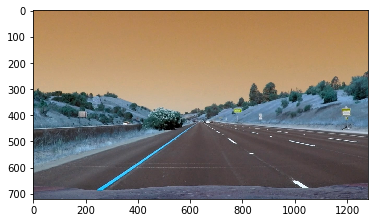

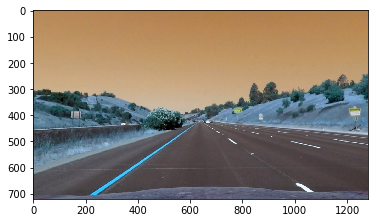

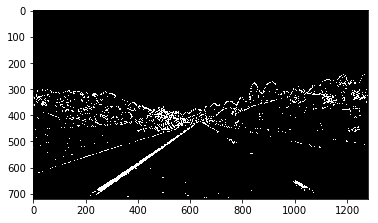

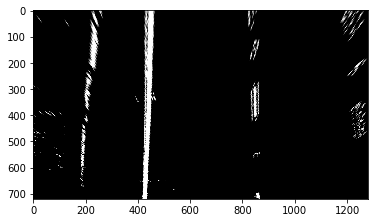

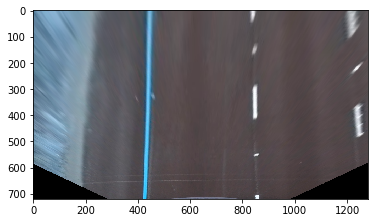

Image: straight_lines2.jpg


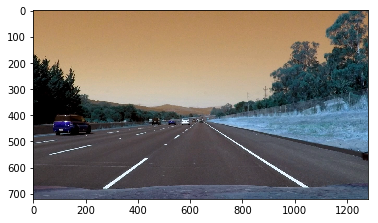

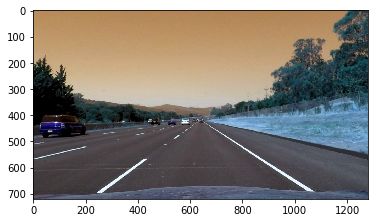

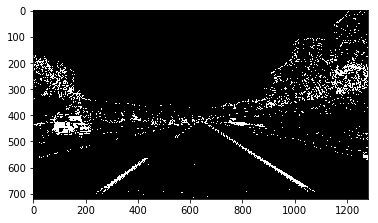

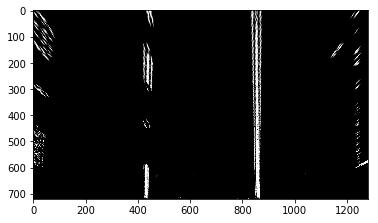

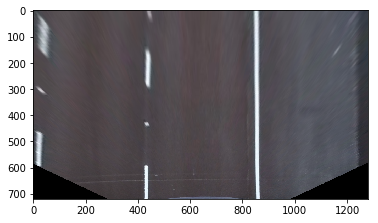

Image: test1.jpg


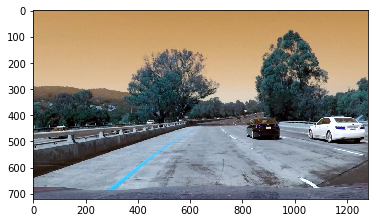

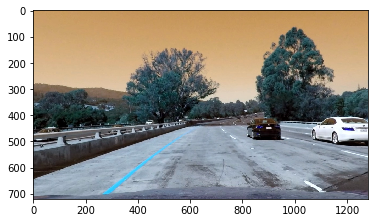

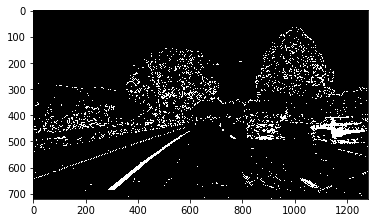

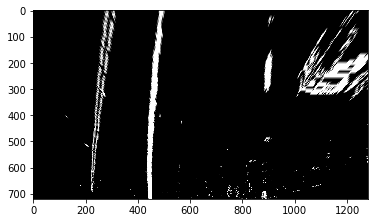

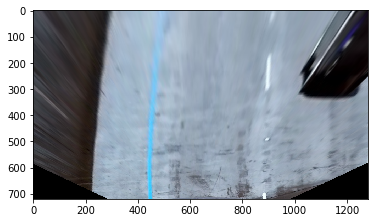

Image: test2.jpg


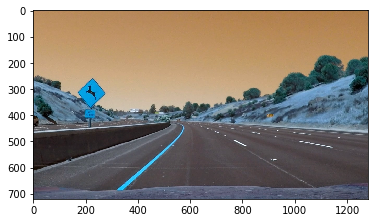

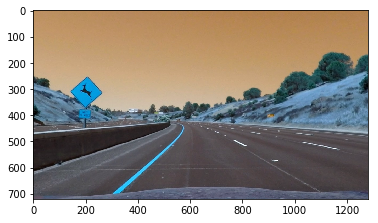

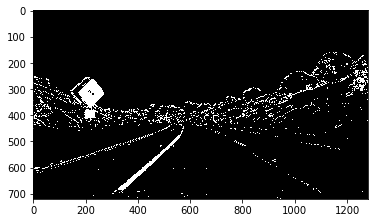

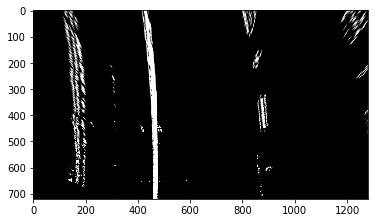

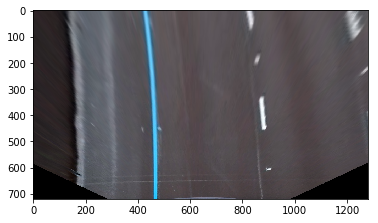

Image: test3.jpg


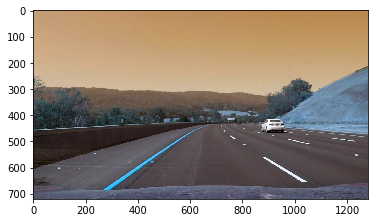

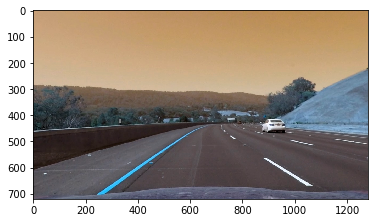

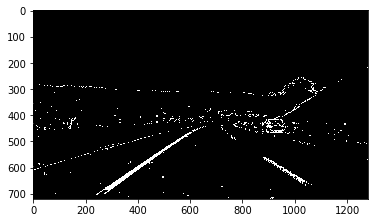

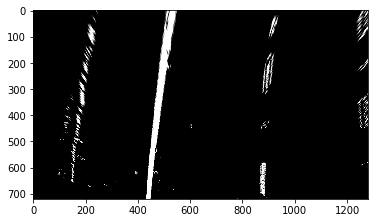

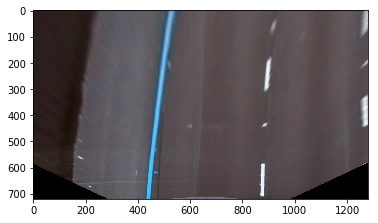

Image: test4.jpg


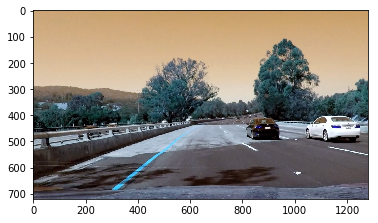

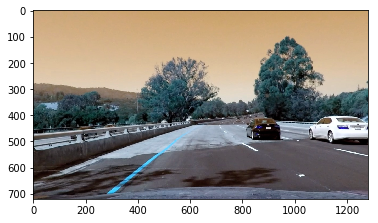

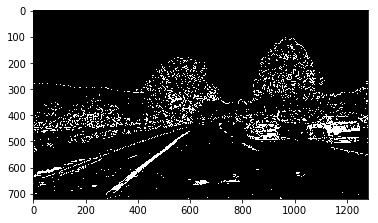

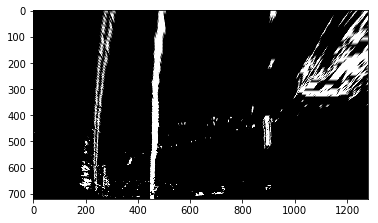

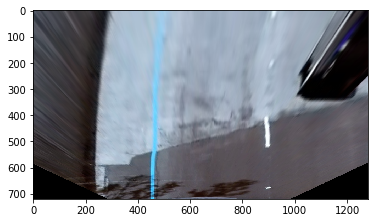

Image: test5.jpg


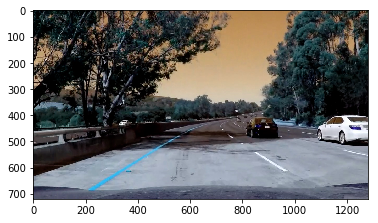

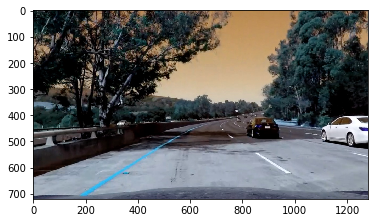

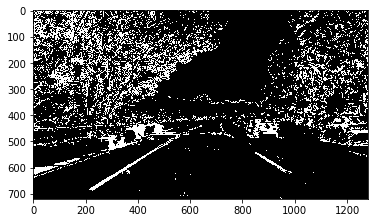

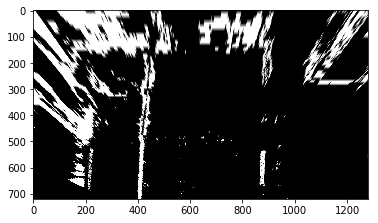

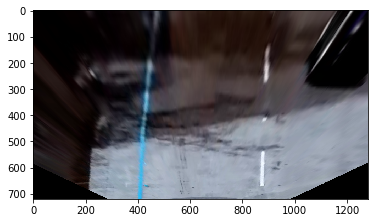

Image: test6.jpg


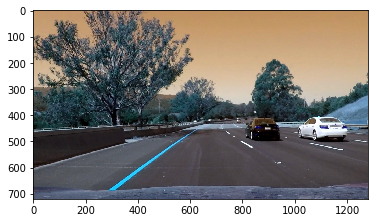

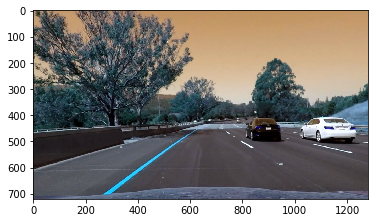

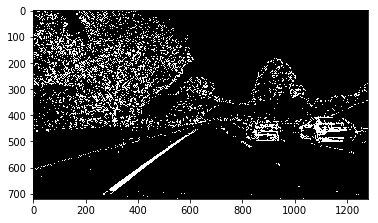

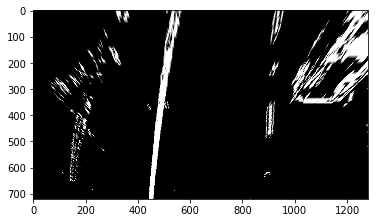

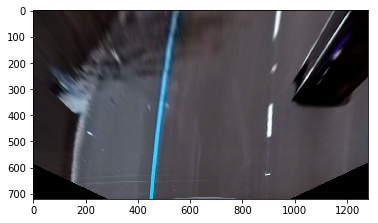

In [322]:
for names in testImages:
    img = cv2.imread(test_path+names)
    print('Image: %s' % names)
    und = undistort(img)
    txf = combinedTransform(und)
    ptx1, Minv1 = warp(txf, src1, dst1)
    und_ptx1, und_Minv1 = unwarp(und, src1, dst1)
    ptx2, Minv2 = warp(txf, src2, dst2)
    und_ptx2, und_Minv2 = unwarp(und, src2, dst2)
    
    printImages([img])
    printImages([und])
    printImages([txf])
    printImages([ptx2])
    printImages([und_ptx2])
    
    und = undistort(img)
    txf = combinedTransform(und)
    write_name = test_output_path + 'Projected_' + names
    plt.imsave(write_name, und_ptx2)

# Find Lane lines

In [321]:
def findLines(binary_warped):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[int(ptx1.shape[0]/2):,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 50
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
 
   # Prepare the polygon for display
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    polygon = np.dstack((warp_zero, warp_zero, warp_zero))
    points_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    points_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((points_left, points_right))
    cv2.fillPoly(polygon, np.int_([pts]), (0,255, 0))

    # Fit new polynomials to x,y in real space
    left_fit = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    
    #Compute the curvatures from the new polynomial fits
    (left_curvature, right_curvature, offset) = computeCurvature(left_fit, right_fit)
    radius = (left_curvature + right_curvature)/2
    
    return (leftx, rightx, lefty, righty, polygon, radius, offset)


In [314]:
def drawLines(img):
    und = undistort(img)
    txf = combinedTransform(und)
    ptx2, Minv2 = warp(txf, src2, dst2)
    (leftx, rightx, lefty, righty, polygon, radius, offset) = findLines(ptx2)
    
    # Unwarp the polygon back to the image
    polyconUnwarp = cv2.warpPerspective(polygon, Minv2, (img_size[0], img_size[1])) 
    
    # Overlay the Radius of curvature and offset on the image
    cv2.putText(img, "Radius of curvature: %.3f m" %(radius), (30,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    cv2.putText(img, "offset to the left: %.8f m" % (offset), (600,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2) 
    result = cv2.addWeighted(img, 1, polyconUnwarp, 0.3, 0)
    return result

# Test the image

Image: straight_lines1.jpg
Image: straight_lines2.jpg
Image: test1.jpg
Image: test2.jpg
Image: test3.jpg
Image: test4.jpg
Image: test5.jpg
Image: test6.jpg


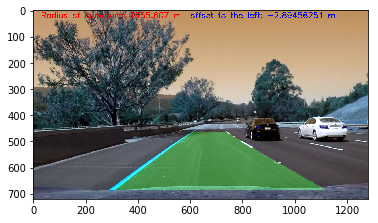

In [319]:
for names in testImages:
    img = cv2.imread(test_path+names)
    print('Image: %s' % names)
    
    und = undistort(img)
    txf = combinedTransform(und)
    write_name = test_output_path + 'Transformed_' + names
    plt.imsave(write_name, txf, cmap=plt.cm.gray)
    
    finalImg = drawLines(img)
    write_name = test_output_path + 'Final_' + names
    plt.imshow(finalImg)
    cv2.imwrite(write_name, finalImg)

# Apply the result to the video

In [306]:
##### Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

lane_output = 'solution_project.mp4'
#lane_output = 'solution_challenge.mp4'

clip1 = VideoFileClip("project_video.mp4")
#clip1 = VideoFileClip("challenge_video.mp4")

lane_clip = clip1.fl_image(drawLines) #NOTE: this function expects color images!!

%time lane_clip.write_videofile(lane_output, audio=False)

clip1.reader.close()
clip1.audio.reader.close_proc()

[MoviePy] >>>> Building video solution_project.mp4
[MoviePy] Writing video solution_project.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [06:36<00:00,  2.92it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: solution_project.mp4 

Wall time: 6min 38s
